# The Numbers Behind the Breakthrough: Semmelweis's Handwashing Data Revisited

![image](images/handwash_banner.png)

## 1. Introduction 

In the early 1840s, the Vienna General Hospital was a place of both hope and despair. While it was a leading medical institution, it was also the site of a devastating phenomenon: childbed fever, a deadly disease affecting women who had just given birth. Shockingly, as many as 10% of women delivering babies at the hospital succumbed to this illness. Among the physicians working there was Dr. Ignaz Semmelweis, a Hungarian physician born in 1818, who would later be hailed as a pioneer in the field of medical hygiene.

Dr. Semmelweis was deeply troubled by the high mortality rates from childbed fever. Through careful observation and analysis, he hypothesised that the cause of the disease was the contaminated hands of doctors who performed autopsies and then attended to childbirths without washing their hands. Despite his compelling evidence, his contemporaries were skeptical and resistant to his pleas for handwashing. This resistance would delay the widespread adoption of this life-saving practice for decades.

In this Jupyter notebook, we will re-analyse the data that led Dr. Semmelweis to his groundbreaking discovery. By examining the mortality rates before and after the implementation of handwashing, we aim to shed light on the profound impact of this simple yet revolutionary practice. Through this analysis, we hope to honor Dr. Semmelweis's legacy and underscore the critical importance of hygiene in medical settings.

## 2. Disturbing Death Toll

To understand the gravity of the situation at the Vienna General Hospital during the 1840s, we begin by examining the data that made Dr. Ignaz Semmelweis realise something was terribly wrong with the hospital's procedures. Using `pandas.read_csv`, we load a dataset that contains the number of women giving birth at the hospital's two clinics between 1841 and 1846. The data reveals a shocking reality: childbirth was extremely dangerous, with a significant number of women dying as a result, primarily from childbed fever.

In [1]:
# Importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


To better grasp the severity of the issue, we focus on the **proportion of deaths** relative to the number of women giving birth. This metric allows us to quantify the risk faced by women during childbirth. Specifically, we zoom in on **Clinic 1**, where the mortality rates were particularly alarming.

In [2]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"]/yearly["births"]

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out clinic_1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


### Key Observations:
- The data shows that a substantial proportion of women who gave birth in Clinic 1 died from childbed fever.
- The mortality rates were consistently high, indicating a systemic issue rather than an isolated incident.
- These findings highlight the urgent need for intervention, which Dr. Semmelweis later identified as the lack of hand hygiene among medical staff.

By analysing the proportion of deaths, we can clearly see why Dr. Semmelweis was deeply concerned and motivated to investigate the root cause of this tragedy. In the following sections, we will delve deeper into the data to explore how his discovery of handwashing transformed the outcomes for women at the Vienna General Hospital.

## 3. What is Happening at the Clinics

To gain a clearer understanding of the differences in outcomes between the two clinics at the Vienna General Hospital, we plot the **proportion of deaths** at both **Clinic 1** and **Clinic 2** over the years 1841 to 1846. This visualisation reveals a striking and curious pattern that underscores the severity of the situation and provides critical context for Dr. Semmelweis's investigation.

<Axes: xlabel='year', ylabel='Proportion deaths'>

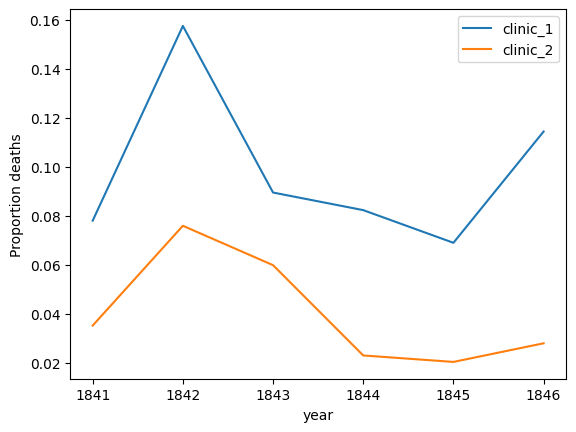

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths",
              label="clinic_1")
clinic_2.plot(x="year", y="proportion_deaths",
         label="clinic_2", ax=ax, ylabel="Proportion deaths")

### Key Observations:
- **Clinic 1** consistently exhibits a significantly higher proportion of deaths compared to **Clinic 2**.
- The disparity in mortality rates between the two clinics suggests that the risk of childbed fever was not evenly distributed, pointing to differences in practices or procedures.
- This pattern raises important questions about what was happening in Clinic 1 that led to such alarming outcomes, ultimately guiding Dr. Semmelweis toward his groundbreaking discovery.

By examining this pattern, we can better appreciate the urgency of Dr. Semmelweis's work and the profound impact of his findings on medical practices. In the next section, we will explore the factors that contributed to this disparity and how handwashing emerged as the key to saving lives.

## 4. Taking Action: Handwashing Initiative Begins

The persistent and alarming disparity in mortality rates between **Clinic 1** and **Clinic 2** left Dr. Semmelweis deeply puzzled and distressed. After careful observation, he identified a key difference between the two clinics: **Clinic 1** was staffed primarily by medical students who not only attended to childbirths but also spent significant time in autopsy rooms examining corpses. In contrast, **Clinic 2** was staffed by midwife students who focused solely on assisting with deliveries. This observation led Semmelweis to suspect that something from the corpses—transferred via the hands of the medical students—was causing childbed fever.

In a bold and desperate move to curb the high mortality rates, Semmelweis made a groundbreaking decree: **"Wash your hands!"** This was an unorthodox and controversial directive at the time, as the concept of bacteria and germ theory was unknown in Vienna during the 1840s. Handwashing was not yet recognised as a medical practice, and Semmelweis's insistence on it was met with skepticism and resistance from his peers.

To evaluate the impact of this intervention, we now load **monthly data from Clinic 1** to analyse whether the introduction of handwashing had any effect on the proportion of deaths. This analysis will allow us to quantify the effectiveness of Semmelweis's intervention and shed light on one of the most important discoveries in medical history.

In the next section, we will explore the data to determine whether handwashing truly made a difference in saving lives at the Vienna General Hospital.

In [5]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] =  monthly["deaths"]/monthly["births"]

# Print out the first rows in monthly
print(monthly.head(5))

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## 5. Handwashing: A Simple Act, A Big Difference

With the monthly data from **Clinic 1** now loaded, we can visualise the **proportion of deaths over time** to assess the impact of Dr. Semmelweis's handwashing intervention. In the plot below, we examine the trend in mortality rates before and after the introduction of obligatory handwashing. While the exact point where handwashing was mandated is not explicitly marked, the dramatic reduction in the proportion of deaths is so significant that it becomes unmistakable.

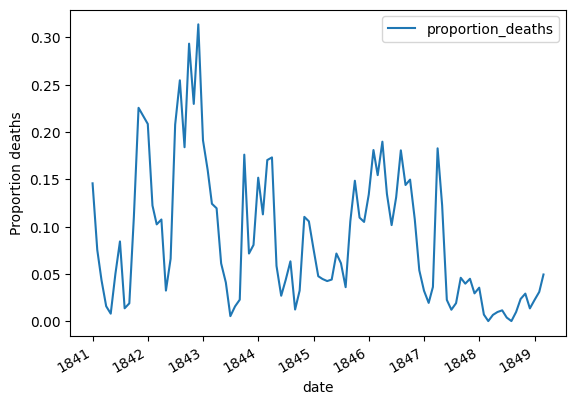

In [6]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths",
         ylabel="Proportion deaths")

### Key Observations:
- **Before Handwashing:** The proportion of deaths remains consistently high, reflecting the devastating toll of childbed fever on women giving birth in Clinic 1.
- **After Handwashing:** A sharp and sustained decline in the proportion of deaths is evident, demonstrating the profound effectiveness of handwashing in reducing mortality rates.
- The visual contrast between the two periods is striking, highlighting how a simple yet revolutionary practice could save countless lives.

This analysis underscores the importance of Semmelweis's discovery and the critical role of hand hygiene in preventing infections. Despite initial resistance, the data speaks for itself: handwashing was a game-changer in the fight against childbed fever. In the next section, we will quantify the exact reduction in mortality rates and reflect on the broader implications of this discovery for modern medicine.

## 6. The Effect of Handwashing: A Closer Look

From the summer of 1847 onward, the data reveals a dramatic and unmistakable decline in the **proportion of deaths** at **Clinic 1**. This turning point coincides precisely with the moment Dr. Semmelweis made handwashing obligatory for medical staff. To make the impact of this intervention even clearer, we highlight the period when handwashing was enforced in the graph below.

<Axes: xlabel='date', ylabel='Proportion deaths'>

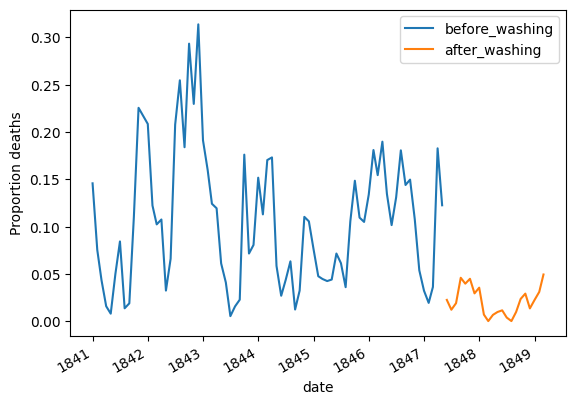

In [7]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
              label="before_washing")
after_washing.plot(x="date", y="proportion_deaths",
         label="after_washing", ax=ax, ylabel="Proportion deaths")

### Key Observations:
- **Before Summer 1847:** The proportion of deaths remains alarmingly high, reflecting the devastating consequences of childbed fever in the absence of hand hygiene.
- **After Summer 1847:** The introduction of obligatory handwashing leads to a sharp and sustained reduction in mortality rates, demonstrating the life-saving power of this simple practice.
- The highlighted section of the graph vividly illustrates the transformative effect of Semmelweis's intervention, leaving no doubt about its effectiveness.

This visualisation not only validates Semmelweis's hypothesis but also serves as a powerful reminder of the importance of evidence-based practices in medicine. The drastic reduction in deaths underscores how a single, well-reasoned intervention can have a profound impact on public health. In the next section, we will quantify the exact reduction in mortality rates and explore the broader implications of this discovery.

## 7. Handwashing Saves Lives

The graph makes it abundantly clear that handwashing had a monumental effect on reducing the **monthly proportion of deaths** at **Clinic 1**. But just how significant was this reduction? To quantify the impact, we calculate the **average monthly proportion of deaths before and after the introduction of obligatory handwashing** in the summer of 1847.

In [13]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
print("Averge monthly proportion of death before: {}".format(before_proportion.mean()))
after_proportion = after_washing["proportion_deaths"]
print("Averge monthly proportion of death after: {}".format(after_proportion.mean()))
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

Averge monthly proportion of death before: 0.10504998260908789
Averge monthly proportion of death after: 0.021093375097254535


np.float64(-0.08395660751183336)

### Key Findings:
- **Before Handwashing (1841–1847):** The average monthly percentage of deaths was alarmingly high (**about 10%**), reflecting the devastating toll of childbed fever.
- **After Handwashing (1847–1848):** The average monthly percentage of deaths dropped dramatically (**to about 2%**), showcasing the life-saving power of hand hygiene.
- On average, handwashing reduced the monthly proportion of deaths by **8%**.

This staggering reduction underscores the profound impact of Semmelweis's intervention. By simply ensuring that medical staff washed their hands, countless lives were saved, and the trajectory of maternal healthcare was forever changed. This discovery not only validated Semmelweis's hypothesis but also laid the groundwork for modern hygiene practices in medicine.

In the next section, we will reflect on the broader implications of this discovery and its enduring legacy in the field of public health.

## 8. Semmelweis' Handwashing Legacy: Robust Evidence from Bootstrap Analysis

The data shows that the introduction of handwashing reduced the **monthly proportion of deaths** by approximately **8 percentage points**, from an average of **10%** to just **2%**. While this reduction is remarkable, it’s important to understand the uncertainty surrounding this estimate. To quantify this uncertainty, we perform a **bootstrap analysis**, a statistical method that allows us to estimate the confidence interval for the reduction in mortality rates due to handwashing.

### Key Steps in the Bootstrap Analysis:
1. **Resampling the Data:** We repeatedly resample the monthly proportion of deaths before and after handwashing was introduced, creating thousands of simulated datasets.
2. **Calculating the Reduction:** For each resampled dataset, we calculate the difference in the average proportion of deaths before and after handwashing.
3. **Confidence Interval:** Using the distribution of these differences, we construct a **95% confidence interval** to estimate the range within which the true reduction in mortality rates likely falls.

In [14]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_before.mean() - boot_after.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067237
0.975    0.101493
dtype: float64

### Results:
- The bootstrap analysis reveals that handwashing reduced the proportion of deaths by **approximately 8 percentage points**, with a 95% confidence interval of **[6.7%, 10%]**.
- This means we can be highly confident that the true effect of handwashing lies within this range, further solidifying the significance of Semmelweis's discovery.

### Interpretation:
- Even by modern standards, a reduction from 10% to 2% represents a monumental improvement in patient outcomes.
- The confidence interval provides a measure of the precision of our estimate, highlighting the robustness of the findings.

This analysis not only reinforces the life-saving impact of handwashing but also demonstrates the power of statistical methods to quantify and validate historical data. In the next section, we will reflect on the broader implications of Semmelweis's work and its relevance to modern healthcare practices.

## 9. Semmelweis: A Pioneer Unrecognised in His Time

The data leaves no doubt: handwashing reduced the **proportion of deaths** by between **6.7 and 10 percentage points**, as evidenced by a **95% confidence interval**. This analysis provides solid evidence that handwashing was a simple yet highly effective procedure capable of saving countless lives. Tragically, despite the overwhelming data, Dr. Semmelweis's groundbreaking theory—that childbed fever was caused by a "substance" (now known as bacteria) transmitted from autopsy room corpses to patients—was met with ridicule and rejection by the medical community of his time.

### Key Points:
- **Rejection by Contemporaries:** Semmelweis's peers dismissed his findings, refusing to accept that something as simple as handwashing could prevent childbed fever. This resistance was rooted in a lack of understanding of germ theory, which was not yet established in the 1800s.
- **Exile from Vienna General Hospital:** In 1849, Semmelweis was forced to leave the Vienna General Hospital, his career and reputation tarnished by the medical establishment's refusal to embrace his discovery.
- **Limitations of Statistical Communication:** One of the reasons for Semmelweis's failure to convince his colleagues was the absence of statistical tools and visualisations in medical science at the time. He presented his data as raw tables without graphs, confidence intervals, or other statistical arguments that could have made his case more compelling.

### A Missed Opportunity:
Had Semmelweis had access to the analytical tools and visualisations we’ve used in this notebook—such as graphs, confidence intervals, and bootstrap analysis—he might have been more successful in persuading the Viennese doctors to adopt handwashing. His story is a poignant reminder of the importance of clear communication and statistical evidence in advancing scientific understanding.

### Legacy:
Despite the initial rejection, Semmelweis's work laid the foundation for modern hygiene practices. Today, he is celebrated as a pioneer of antiseptic procedures, and his discovery of handwashing remains one of the most important contributions to public health. His tragic fate serves as a lesson in the power of data, the necessity of evidence-based medicine, and the critical role of effective communication in science.


In [15]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True